# Forbes billionaires 2022- Exploratory data analysis and visualization 

# Overview 

In [1]:
#Billionaires of 2022 curated by Forbes (https://www.forbes.com/billionaires/)

In [2]:
#Questions 

#Who are the top ten billionaire with the highest net worth in 2022
#Who are the top 10 youngest billionaires in 2022
#Who is the youngest billionaire with the highest net worth in 2022
#Which age group has highest net worth in 2022
#Which countries have highest number of billionaires in 2022
#Which countries have highest cumulative billionaires net worth in 2022
#Which industries have highest number of billionaires in 2022
#Which industries have highest cumulative billionaires net worth in 2022
#Which sources have highest number of billionaires in 2022
#Which sources have highest cumulative billionaires net worth in 2022

In [3]:
# lets import the necessary libraries  
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns  #visualization
import matplotlib.pyplot as plt  #visualization
import matplotlib.colors as mcolors

# Data source

In [4]:
# data were obtained from kaggle and csv file was downloaded to local machine. 
#then data were imported using read_csv() method

df = pd.read_csv(r"C:\Users\bitiy\Documents\PythonProjects\Forbes_2022\2022_forbes_billionaires.csv")

In [5]:
#inspect the data using head(), info(), column() methods
df.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [6]:
df.info()    # help us get general information about the data
  # as we can see 'networth' and 'age' columns have object and integer data type respectively. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2600 non-null   int64 
 1   rank        2600 non-null   int64 
 2   name        2600 non-null   object
 3   networth    2600 non-null   object
 4   age         2600 non-null   int64 
 5   country     2600 non-null   object
 6   source      2600 non-null   object
 7   industry    2600 non-null   object
dtypes: int64(3), object(5)
memory usage: 162.6+ KB


In [7]:
# list the columns names
df.columns     # we have columns that were not needed for this analysis. 
               #so unnamed and rank will be removed or select only the required columns

Index(['Unnamed: 0', 'rank', 'name', 'networth', 'age', 'country', 'source',
       'industry'],
      dtype='object')

# Data cleaning 

In [8]:
# lets select columns required for this analysis
df_selected = df[['name','networth','age','country','source','industry']]
df_selected.head()

,name,networth,age,country,source,industry
0,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [9]:
# all the column names are in lower case. i prefer to have upper case for the first letter. using rename method the first letter for each word were changed. 
#The $B inluded on the networth column title to reflacte the unit of mesurment
df = df_selected.rename({'name':'Name','networth':'Networth $B','age':'Age','country':'Country','source':'Source','industry':'Industry'},axis = 1)
df.head()

,Name,Networth $B,Age,Country,Source,Industry
0,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [10]:
# we can see that the Networth column has characters. so lets get rid of them

df['Networth $B']= df['Networth $B'].str.replace('$','')
df['Networth $B']= df['Networth $B'].str.replace('B','')


In [11]:
#Networth and age were object and integer data type respectively. 
#lets change the data type of 'Networth $B' & 'Age' columns 
df['Networth $B']= pd.to_numeric(df['Networth $B'])

df['Age'] = df['Age'].astype(float)

df.head()

,Name,Networth $B,Age,Country,Source,Industry
0,Elon Musk,219.0,50.0,United States,"Tesla, SpaceX",Automotive
1,Jeff Bezos,171.0,58.0,United States,Amazon,Technology
2,Bernard Arnault & family,158.0,73.0,France,LVMH,Fashion & Retail
3,Bill Gates,129.0,66.0,United States,Microsoft,Technology
4,Warren Buffett,118.0,91.0,United States,Berkshire Hathaway,Finance & Investments


In [12]:
#Let’s check the data type of those columns
df.dtypes   # to check the data type of each column after changing the data type


Name            object
Networth $B    float64
Age            float64
Country         object
Source          object
Industry        object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         2600 non-null   object 
 1   Networth $B  2600 non-null   float64
 2   Age          2600 non-null   float64
 3   Country      2600 non-null   object 
 4   Source       2600 non-null   object 
 5   Industry     2600 non-null   object 
dtypes: float64(2), object(4)
memory usage: 122.0+ KB


In [14]:
# check if there are duplicates in the data
df.duplicated()      #no duplicates in the data

0       False
1       False
2       False
3       False
4       False
        ...  
2595    False
2596    False
2597    False
2598    False
2599    False
Length: 2600, dtype: bool

In [15]:
# check for missing values 
df.isnull().sum()    #no missing data

Name           0
Networth $B    0
Age            0
Country        0
Source         0
Industry       0
dtype: int64

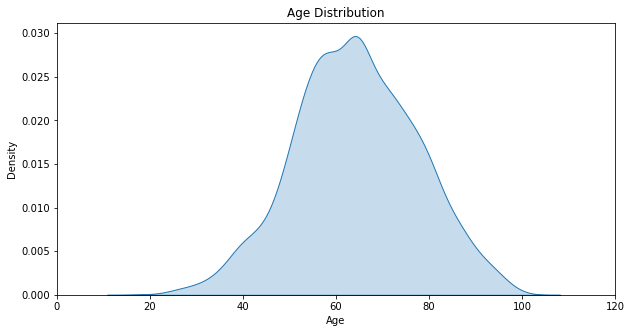

In [16]:
#check for distribution of continuous variables

# check for distribution of Age
plt.figure(figsize=(10,5))
plt.xlim(0,120)
plt.xlabel('Age')
plt.ylabel('Density')
sns.kdeplot(df['Age'],shade=True)
plt.title("Age Distribution")
plt.show()       #it looks like age is normally distributed 

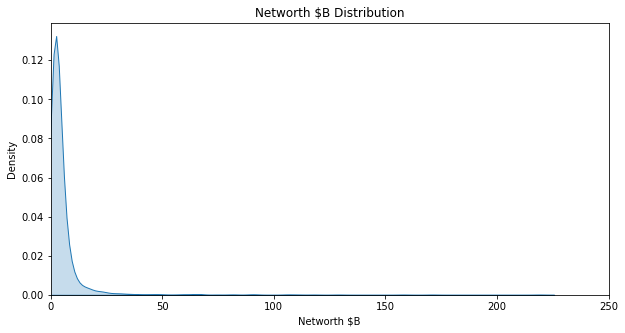

In [17]:
# check for distribution of Networth $B
plt.figure(figsize=(10,5))
plt.xlim(0,250)
plt.xlabel('Networth $B')
plt.ylabel('Density')
plt.title("Networth $B Distribution")
sns.kdeplot(df['Networth $B'],shade=True)
plt.show()     #Networth is skiwed to the right 

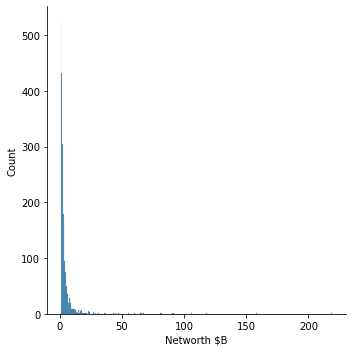

In [18]:
sns.displot(df['Networth $B'])

<AxesSubplot:xlabel='Networth $B'>

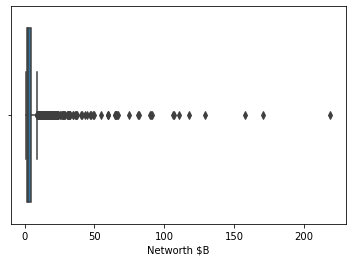

In [19]:
sns.boxplot(x=df['Networth $B'])

In [20]:
#Transform age to create new varible called Agegroup

df=df.assign(Agegroup=pd.cut(df['Age'], bins=[19, 39, 59, 79,100], right=False,include_lowest=True, labels=["below 40", "40-59", "60-79", "80 and above"]))
df.head(10)

,Name,Networth $B,Age,Country,Source,Industry,Agegroup
0,Elon Musk,219.0,50.0,United States,"Tesla, SpaceX",Automotive,40-59
1,Jeff Bezos,171.0,58.0,United States,Amazon,Technology,40-59
2,Bernard Arnault & family,158.0,73.0,France,LVMH,Fashion & Retail,60-79
3,Bill Gates,129.0,66.0,United States,Microsoft,Technology,60-79
4,Warren Buffett,118.0,91.0,United States,Berkshire Hathaway,Finance & Investments,80 and above
5,Larry Page,111.0,49.0,United States,Google,Technology,40-59
6,Sergey Brin,107.0,48.0,United States,Google,Technology,40-59
7,Larry Ellison,106.0,77.0,United States,software,Technology,60-79
8,Steve Ballmer,91.4,66.0,United States,Microsoft,Technology,60-79
9,Mukesh Ambani,90.7,64.0,India,diversified,Diversified,60-79


# Analysis 

In [21]:
# descriptive analysis
Mean_age= round(df['Age'].mean(),1)
print("Mean age was",Mean_age,'years')

Mean age was 64.3 years


In [22]:
# finding the Standard deviation
print("Standard Deviation of age was",round(df['Age'].std(),1))    #the mean(+-sd) of age of the billionnaire were 64.3(13.2) years

Standard Deviation of age was 13.2


In [23]:
minimum_age=df["Age"].min()
maximum_age=df["Age"].max()

print("The minimum age was :", minimum_age, "years old" )
print("The maximum age was :", maximum_age, "years old" )

The minimum age was : 19.0 years old
The maximum age was : 100.0 years old


In [24]:
#lets count the number of billionarries in each age group
df['Agegroup'].value_counts()    #In the year 2022, majority of billionaries were in the age range of 60-79 followed by 40-59. only 67 billinonairs who are under the age of 40.

60-79           1313
40-59            826
80 and above     393
below 40          67
Name: Agegroup, dtype: int64

In [25]:
#Which agegroup has highest number of billionaires

df['Agegroup'].value_counts().rename_axis('Agegroup')  #

Agegroup
60-79           1313
40-59            826
80 and above     393
below 40          67
Name: Agegroup, dtype: int64

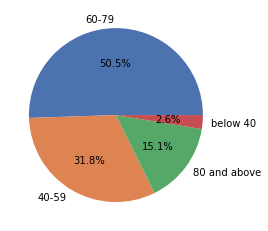

In [26]:
#define data
data = [1313,  826, 393, 67]
labels = ['60-79', '40-59', '80 and above', 'below 40']

#define Seaborn color palette to use
colors = sns.color_palette('deep')[0:4]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%1.1f%%')
plt.show()

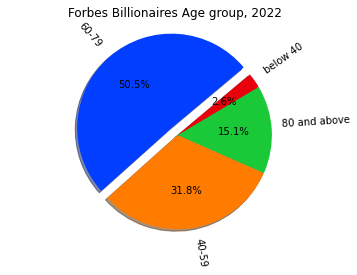

In [27]:
#define data
data = [1313,  826, 393, 67]
labels = ['60-79', '40-59', '80 and above', 'below 40']

#define Seaborn color palette to use
#colors = sns.color_palette('deep')[0:4]
explode = [0.1, 0, 0, 0]

# Seaborn color palette to plot pie chart
colors = sns.color_palette('bright')

# create pie chart using matplotlib
plt.pie(data, labels=labels, colors=colors,
        autopct='%1.1f%%', explode=explode, shadow=True, rotatelabels='true',startangle=40)    
plt.title('Forbes Billionaires Age group, 2022')
plt.axis('equal')
plt.show()

In [28]:
# since networth is skiwed we cannot use mean. so i will use median to describe it.
Median_Networth= df['Networth $B'].median()
print("The median networth of the billionnaire was",Median_Networth,"billion$ in 2022")     

The median networth of the billionnaire was 2.4 billion$ in 2022


In [29]:
#finding 25th percentile of age and Networth columns
df[['Age', 'Networth $B']].quantile(.25)  #25th percentile of billionnaiers age were below 55 years 
                                          #25th percentile of billionnaiers newtworth were below 1.5B$ 

Age            55.0
Networth $B     1.5
Name: 0.25, dtype: float64

In [30]:
#finding 50th percentile of age and Networth columns
df[['Age', 'Networth $B']].quantile(.50)  #50th percentile of billionnaiers age were below 64 years 
                                          #50th percentile of billionnaiers newtworth were below 2.4B$

Age            64.0
Networth $B     2.4
Name: 0.5, dtype: float64

In [31]:
#find 75th percentile of age and Networth columns
df[['Age', 'Networth $B']].quantile(.75)   
                                #75th percentile of billionnaiers age were below 74 years 
                                #75th percentile of billionnaiers newtworth were below 4.5B$

Age            74.0
Networth $B     4.5
Name: 0.75, dtype: float64

In [32]:
#finding 95th percentile of age and Networth columns
df[['Age', 'Networth $B']].quantile(.95)  
                           #95th percentile of billionnaiers age were below 86 years 
                            #95th percentile of billionnaiers newtworth were below 14B$

Age            86.0
Networth $B    14.0
Name: 0.95, dtype: float64

In [33]:
#finding 99th percentile of age and Networth columns
df[['Age', 'Networth $B']].quantile(.99)  
                           #99th percentile of billionnaiers age were below 94 years. i.e only one persent of them are above 94years of age
                            #99th percentile of billionnaiers newtworth were below 47.3B$ i.e only one percent of them having above 47.3B$ of networth

Age            94.000
Networth $B    47.319
Name: 0.99, dtype: float64

In [34]:
# we can also genarate multiple percentile for a given varibale in one go. lets check it for age and networth separately
# Generate multiple percentiles with df.quantile() 
print(df['Age'].quantile(q=[0.05,0.25,0.50,0.75, 0.95,0.99]))   

0.05    42.0
0.25    55.0
0.50    64.0
0.75    74.0
0.95    86.0
0.99    94.0
Name: Age, dtype: float64


In [35]:
# Generate multiple percentiles and select 99th percentile value 
print("99th percentile of age was", df['Age'].quantile(q=[0.05,0.25,0.50,0.75, 0.95,0.99])[0.99],"years")   

99th percentile of age was 94.0 years


In [36]:
# Generate multiple percentiles with df.quantile() 
print(df['Networth $B'].quantile(q=[0.05,0.25,0.50,0.75, 0.95,0.99]))   

0.05     1.100
0.25     1.500
0.50     2.400
0.75     4.500
0.95    14.000
0.99    47.319
Name: Networth $B, dtype: float64


In [37]:
# Generate multiple percentiles and select 99th percentile value 
print("99th percentile of networth was", round(df['Networth $B'].quantile(q=[0.05,0.25,0.50,0.75, 0.95,0.99])[0.99],1),"B$")   

99th percentile of networth was 47.3 B$


In [38]:
# ranges of networth
print("Range was",df['Networth $B'].max()-df['Networth $B'].min())

Range was 218.0


In [39]:
#calculate interquartile range of values in the 'networth' column
q75, q25 = np.percentile(df['Networth $B'], [75 ,25])
iqr = q75 - q25
iqr   #The interquartile range of values in the points column turns out to be 3.0

3.0

In [40]:
#who are the top 10 richest Billionaire in 2022?

richest_10= df.sort_values(by="Networth $B", ascending=False)[:10] # top 10 richest billionaires  
richest_10

,Name,Networth $B,Age,Country,Source,Industry,Agegroup
0,Elon Musk,219.0,50.0,United States,"Tesla, SpaceX",Automotive,40-59
1,Jeff Bezos,171.0,58.0,United States,Amazon,Technology,40-59
2,Bernard Arnault & family,158.0,73.0,France,LVMH,Fashion & Retail,60-79
3,Bill Gates,129.0,66.0,United States,Microsoft,Technology,60-79
4,Warren Buffett,118.0,91.0,United States,Berkshire Hathaway,Finance & Investments,80 and above
5,Larry Page,111.0,49.0,United States,Google,Technology,40-59
6,Sergey Brin,107.0,48.0,United States,Google,Technology,40-59
7,Larry Ellison,106.0,77.0,United States,software,Technology,60-79
8,Steve Ballmer,91.4,66.0,United States,Microsoft,Technology,60-79
9,Mukesh Ambani,90.7,64.0,India,diversified,Diversified,60-79


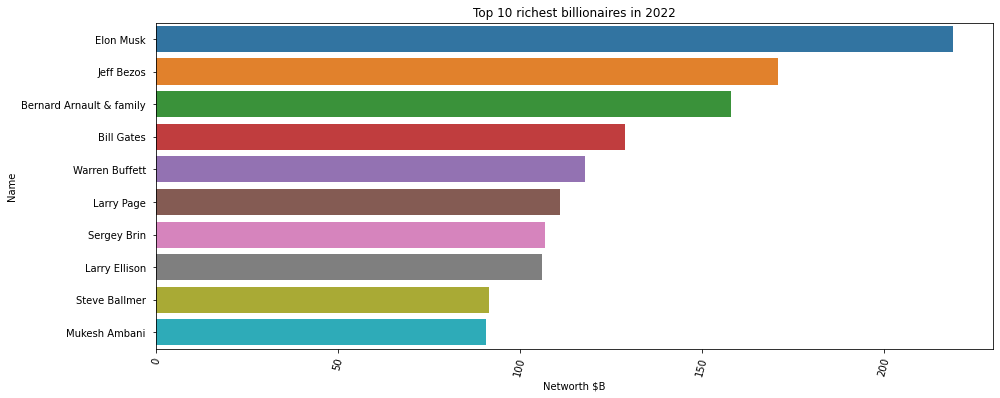

In [41]:
plt.figure(figsize=[15, 6])
plt.xticks(rotation=75)
plt.title("Top 10 richest billionaires in 2022")
sns.barplot(data=richest_10, x=richest_10["Networth $B"], y=richest_10["Name"])
plt.show()

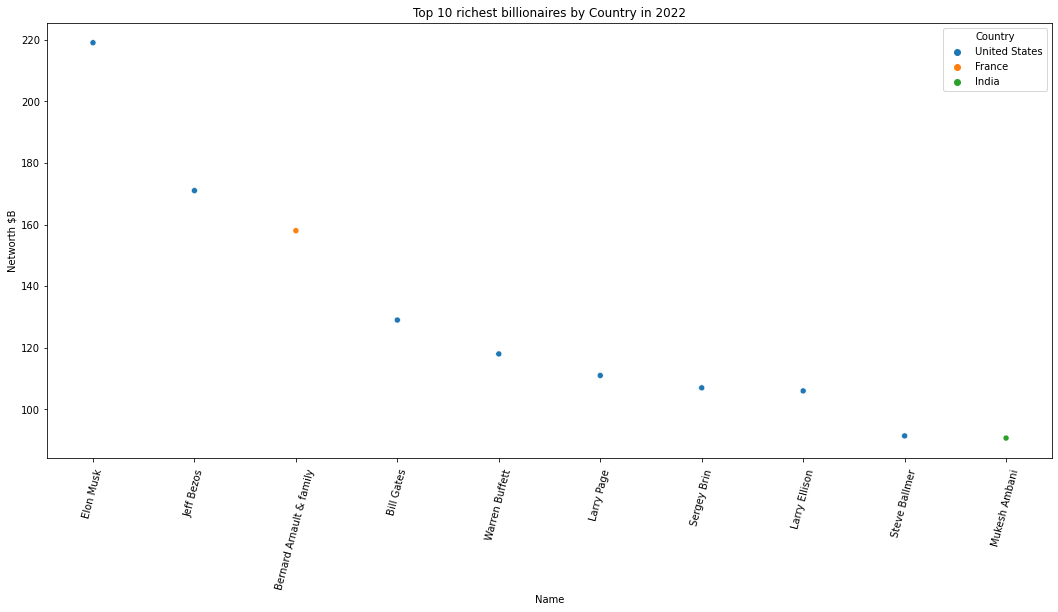

In [42]:
plt.figure(figsize=[18, 8])
plt.xticks(rotation=75)
plt.title("Top 10 richest billionaires by Country in 2022")
sns.scatterplot(data=richest_10, y=richest_10["Networth $B"], x=richest_10["Name"],hue=richest_10["Country"])
plt.show()

In [43]:
#how many billionaies' net worth is 50B$ and above in 2022?
df_richest= df[df['Networth $B']>=50]
df_richest    # only 25 billionaires' worth was greaater >50B$ in 2022. 

,Name,Networth $B,Age,Country,Source,Industry,Agegroup
0,Elon Musk,219.0,50.0,United States,"Tesla, SpaceX",Automotive,40-59
1,Jeff Bezos,171.0,58.0,United States,Amazon,Technology,40-59
2,Bernard Arnault & family,158.0,73.0,France,LVMH,Fashion & Retail,60-79
3,Bill Gates,129.0,66.0,United States,Microsoft,Technology,60-79
4,Warren Buffett,118.0,91.0,United States,Berkshire Hathaway,Finance & Investments,80 and above
5,Larry Page,111.0,49.0,United States,Google,Technology,40-59
6,Sergey Brin,107.0,48.0,United States,Google,Technology,40-59
7,Larry Ellison,106.0,77.0,United States,software,Technology,60-79
8,Steve Ballmer,91.4,66.0,United States,Microsoft,Technology,60-79
9,Mukesh Ambani,90.7,64.0,India,diversified,Diversified,60-79


In [44]:
df[df['Networth $B']>=150]  # Elon Musk, Jeff Bozes, and Bernard Arnault and family were the leading billionaire in the world in 2022 with net worth of 219,171 and 158 B$, respectively.

,Name,Networth $B,Age,Country,Source,Industry,Agegroup
0,Elon Musk,219.0,50.0,United States,"Tesla, SpaceX",Automotive,40-59
1,Jeff Bezos,171.0,58.0,United States,Amazon,Technology,40-59
2,Bernard Arnault & family,158.0,73.0,France,LVMH,Fashion & Retail,60-79


In [45]:
# lets say we want to filter all the data whose age was less than 30
df.query('Age < 30')   #those were the 12 billionare whose age was under 30 years

,Name,Networth $B,Age,Country,Source,Industry,Agegroup
436,Gary Wang,5.9,28.0,United States,cryptocurrency exchange,Finance & Investments,below 40
649,Gustav Magnar Witzoe,4.5,28.0,Norway,fish farming,Food & Beverage,below 40
1311,Kevin David Lehmann,2.4,19.0,Germany,drugstores,Fashion & Retail,below 40
1518,Ryan Breslow,2.0,27.0,United States,e-commerce software,Technology,below 40
1887,Austin Russell,1.6,27.0,United States,sensors★,Automotive,below 40
1961,Henrique Dubugras,1.5,26.0,Brazil,fintech,Finance & Investments,below 40
1975,Pedro Franceschi,1.5,25.0,Brazil,fintech,Finance & Investments,below 40
2062,Wang Zelong,1.5,25.0,China,chemicals,Metals & Mining,below 40
2190,Alexandra Andresen,1.3,25.0,Norway,investments,Diversified,below 40
2191,Katharina Andresen,1.3,26.0,Norway,investments,Diversified,below 40


In [46]:
# who are the top 10 youngest Billionaires    
youngest= df.sort_values(by=['Age'])[:10] # top 10 youngest billionaires
youngest

,Name,Networth $B,Age,Country,Source,Industry,Agegroup
1311,Kevin David Lehmann,2.4,19.0,Germany,drugstores,Fashion & Retail,below 40
2062,Wang Zelong,1.5,25.0,China,chemicals,Metals & Mining,below 40
1975,Pedro Franceschi,1.5,25.0,Brazil,fintech,Finance & Investments,below 40
2190,Alexandra Andresen,1.3,25.0,Norway,investments,Diversified,below 40
1961,Henrique Dubugras,1.5,26.0,Brazil,fintech,Finance & Investments,below 40
2191,Katharina Andresen,1.3,26.0,Norway,investments,Diversified,below 40
1518,Ryan Breslow,2.0,27.0,United States,e-commerce software,Technology,below 40
1887,Austin Russell,1.6,27.0,United States,sensors★,Automotive,below 40
436,Gary Wang,5.9,28.0,United States,cryptocurrency exchange,Finance & Investments,below 40
649,Gustav Magnar Witzoe,4.5,28.0,Norway,fish farming,Food & Beverage,below 40


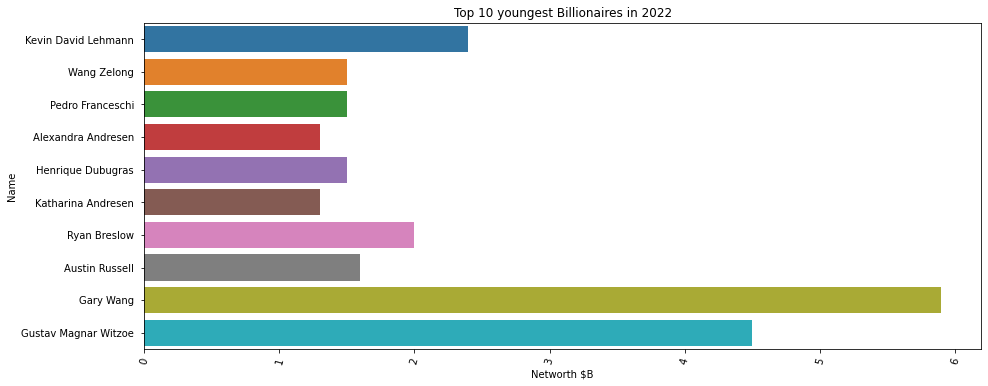

In [47]:
plt.figure(figsize=[15, 6])
plt.xticks(rotation=75)
plt.title("Top 10 youngest Billionaires in 2022")
sns.barplot(data=youngest, x=youngest["Networth $B"], y=youngest["Name"])
plt.show()

In [48]:
#who is the Youngest Billionaire in 2022?
# lets say we want to filter all the data whose age was less than 20 years
df.query('Age < 20')   #there was only one billionaire whose age was under 20 years. he is a 19 years old from Germany

,Name,Networth $B,Age,Country,Source,Industry,Agegroup
1311,Kevin David Lehmann,2.4,19.0,Germany,drugstores,Fashion & Retail,below 40


In [49]:
#who is the youngest billionaire with higher net worth in 2022?

youngest_1= youngest.sort_values(by="Networth $B", ascending=False)[:1] # top 1 richest among the young billionaires  
youngest_1

,Name,Networth $B,Age,Country,Source,Industry,Agegroup
436,Gary Wang,5.9,28.0,United States,cryptocurrency exchange,Finance & Investments,below 40


In [50]:
#Which agegroup has highest the Networth?
agegroup_df = df.groupby("Agegroup")["Networth $B"].sum()
agegroup_df  

Agegroup
below 40         365.50
40-59           3797.35
60-79           6098.20
80 and above    2375.10
Name: Networth $B, dtype: float64

In [51]:
agegroup_df = pd.DataFrame(agegroup_df).sort_values(by="Networth $B", ascending=False)   
agegroup_df

,Networth $B
Agegroup,
60-79,6098.20
40-59,3797.35
80 and above,2375.10
below 40,365.50


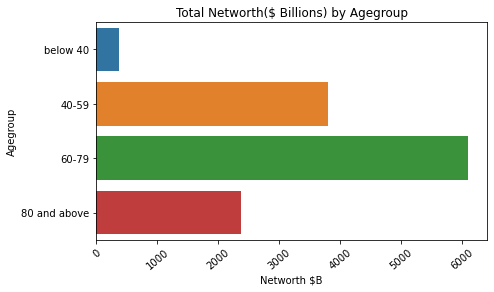

In [52]:
plt.figure(figsize=[7, 4])
plt.xticks(rotation=40)
plt.title("Total Networth($ Billions) by Agegroup")
sns.barplot(data=agegroup_df, x=agegroup_df["Networth $B"], y=agegroup_df.index )
plt.show()

In [53]:
# Which countries have highest number of billionaires
country_df= df['Country'].value_counts().rename_axis('country')    
country_df.head(10)
      # USA, China, India, Germany and Russia were the top 5 countries with highest number of billionaires

country
United States    719
China            515
India            161
Germany          130
Russia            81
Hong Kong         67
Canada            64
Brazil            60
Italy             52
Taiwan            51
Name: Country, dtype: int64

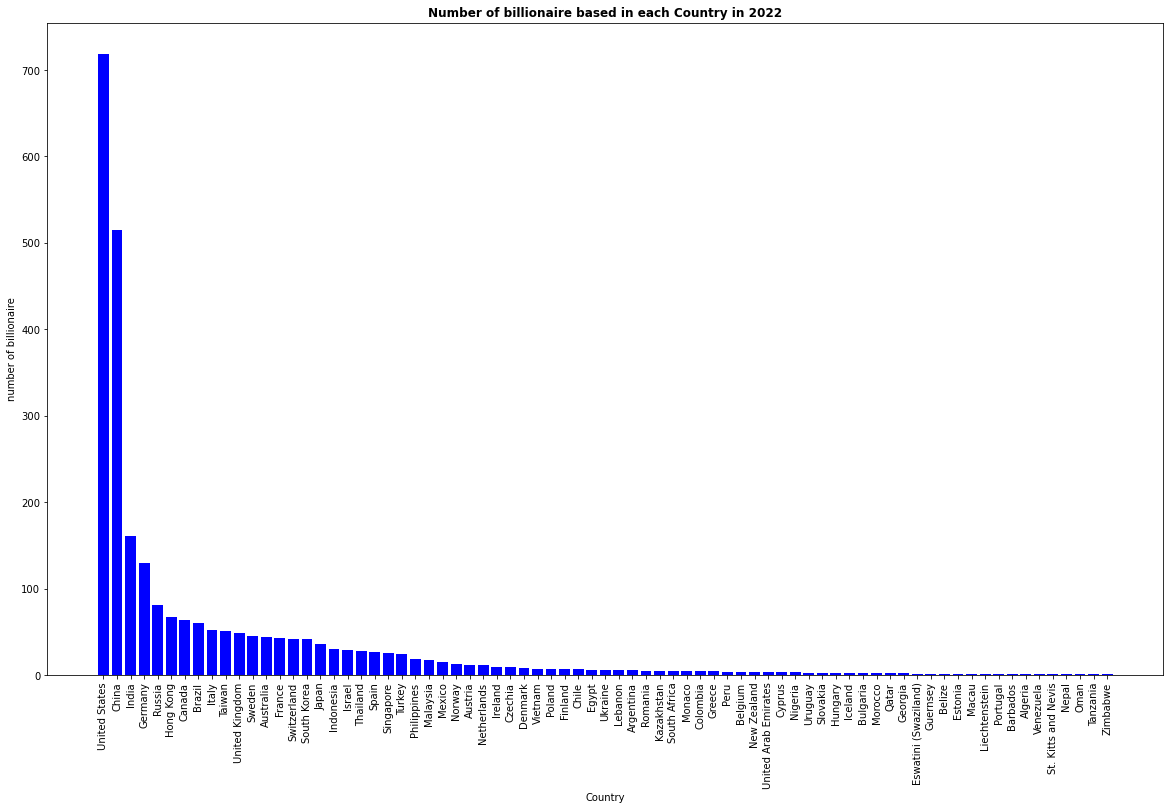

In [54]:

plt.figure(figsize = (20,12))
plt.bar(x = country_df.index, height = country_df.values, color = 'blue')
plt.xticks(rotation = 90)
# Add title and axis names
plt.title('Number of billionaire based in each Country in 2022', weight = 'bold')
plt.xlabel('Country')
plt.ylabel('number of billionaire')
plt.show()

In [55]:
# how many billionaires were from the USA
df.query('Country == "United States"')   # There were 719 billionaires from the USA in 2022

,Name,Networth $B,Age,Country,Source,Industry,Agegroup
0,Elon Musk,219.0,50.0,United States,"Tesla, SpaceX",Automotive,40-59
1,Jeff Bezos,171.0,58.0,United States,Amazon,Technology,40-59
3,Bill Gates,129.0,66.0,United States,Microsoft,Technology,60-79
4,Warren Buffett,118.0,91.0,United States,Berkshire Hathaway,Finance & Investments,80 and above
5,Larry Page,111.0,49.0,United States,Google,Technology,40-59
...,...,...,...,...,...,...,...
2549,Robert Toll,1.1,81.0,United States,home building,Real Estate,80 and above
2578,"Wilbur 'Ed' Bosarge, Jr.",1.0,82.0,United States,high speed trading,Finance & Investments,80 and above
2588,Ronald Clarke,1.0,66.0,United States,payments technology,Technology,60-79
2590,Carl DeSantis,1.0,82.0,United States,energy drink,Food & Beverage,80 and above


In [56]:
# what is the collective worth of billionaires from the USA
print(round(df.query('Country == "United States"')["Networth $B"].sum()))  #collective worth of $4.7 trillion

4685


In [57]:
# how many billionaires were from China
df.query('Country == "China"')  #515 from china

,Name,Networth $B,Age,Country,Source,Industry,Agegroup
16,Zhong Shanshan,65.7,67.0,China,"beverages, pharmaceuticals",Food & Beverage,60-79
24,Zhang Yiming,50.0,38.0,China,TikTok,Media & Entertainment,below 40
33,Ma Huateng,37.2,50.0,China,internet media,Technology,40-59
48,He Xiangjian,28.3,79.0,China,home appliances,Manufacturing,80 and above
54,William Lei Ding,25.2,50.0,China,online games,Technology,40-59
...,...,...,...,...,...,...,...
2573,Zhang Cheng Fei,1.1,54.0,China,paper & related products,Manufacturing,40-59
2574,Zhang Fangliang,1.1,57.0,China,biotechnology,Healthcare,40-59
2575,Baoshen Zhong,1.1,54.0,China,solar energy,Energy,40-59
2576,Zhou Minghua,1.1,58.0,China,pharmaceutical,Healthcare,40-59


In [58]:
# what is the collective worth of billionaires from China
print(round(df.query('Country == "China"')["Networth $B"].sum()))  #collective $1.9 trillion

1938


In [59]:
# how many billionaires were from India
df.query('Country == "India"')  #161 from India

,Name,Networth $B,Age,Country,Source,Industry,Agegroup
9,Mukesh Ambani,90.7,64.0,India,diversified,Diversified,60-79
10,Gautam Adani & family,90.0,59.0,India,"infrastructure, commodities",Diversified,60-79
46,Shiv Nadar,28.7,76.0,India,software services,Technology,60-79
56,Cyrus Poonawalla,24.3,80.0,India,vaccines,Healthcare,80 and above
80,Radhakishan Damani,20.0,67.0,India,"retail, investments",Fashion & Retail,60-79
...,...,...,...,...,...,...,...
2539,Kavita Singhania,1.1,60.0,India,cement,Manufacturing,60-79
2542,Ashok Soota,1.1,79.0,India,software services,Technology,80 and above
2544,Venu Srinivasan,1.1,69.0,India,two-wheelers,Automotive,60-79
2551,Sunil Vachani,1.1,53.0,India,electronics,Manufacturing,40-59


In [60]:
# what is the collective worth of billionaires from India
print(round(df.query('Country == "India"')["Networth $B"].sum()))  #collective worth of 745 B$

745


In [61]:
#Which countries have highest Networth?
country_networth = df.groupby("Country")["Networth $B"].sum()
country_networth    #   

Country
Algeria             5.1
Argentina          14.0
Australia         205.1
Austria            61.7
Barbados            1.7
                  ...  
United States    4685.1
Uruguay             3.0
Venezuela           3.5
Vietnam            21.2
Zimbabwe            3.0
Name: Networth $B, Length: 75, dtype: float64

In [62]:
country_networth = pd.DataFrame(country_networth).sort_values(by="Networth $B", ascending=False)[:10]
country_networth

,Networth $B
Country,
United States,4685.10
China,1938.45
India,744.80
Germany,604.00
France,550.00
Hong Kong,383.40
Russia,318.20
Canada,307.90
Australia,205.10


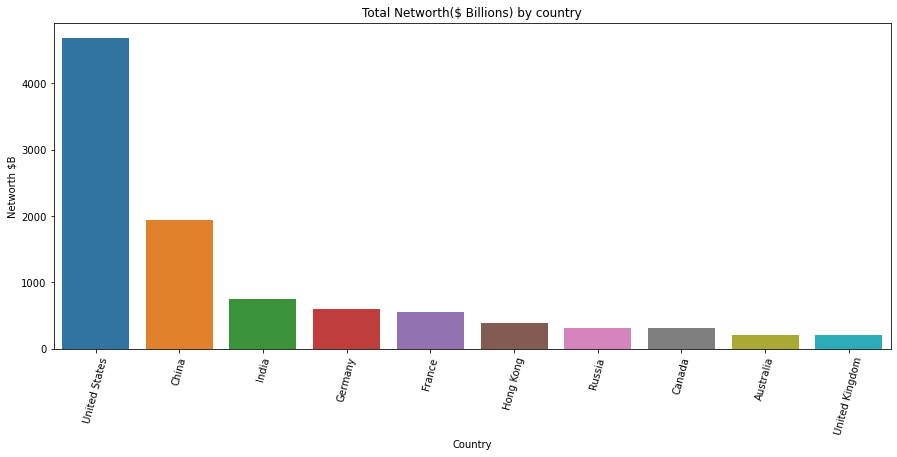

In [63]:
plt.figure(figsize=[15, 6])
plt.xticks(rotation=75)
plt.title("Total Networth($ Billions) by country")
sns.barplot(data=country_networth, x=country_networth.index, y=country_networth["Networth $B"])
plt.show()   # United States of America has the highest wealth followed by china and India

In [64]:
#Which industries have highest number of billionaires
Industry_df_count= df['Industry'].value_counts().rename_axis('Industry')    
Industry_df_count   #Top 5 industries that had higher number of billionaires were Finance & Investments, Technology, Manufacturing, Fashion & Retail, Healthcare

Industry
Finance & Investments          386
Technology                     329
Manufacturing                  322
Fashion & Retail               246
Healthcare                     212
Food & Beverage                201
Real Estate                    189
Diversified                    178
Media & Entertainment           95
Energy                          93
Automotive                      69
Metals & Mining                 67
Service                         51
Construction & Engineering      43
Telecom                         35
Logistics                       35
Sports                          26
Gambling & Casinos              23
Name: Industry, dtype: int64

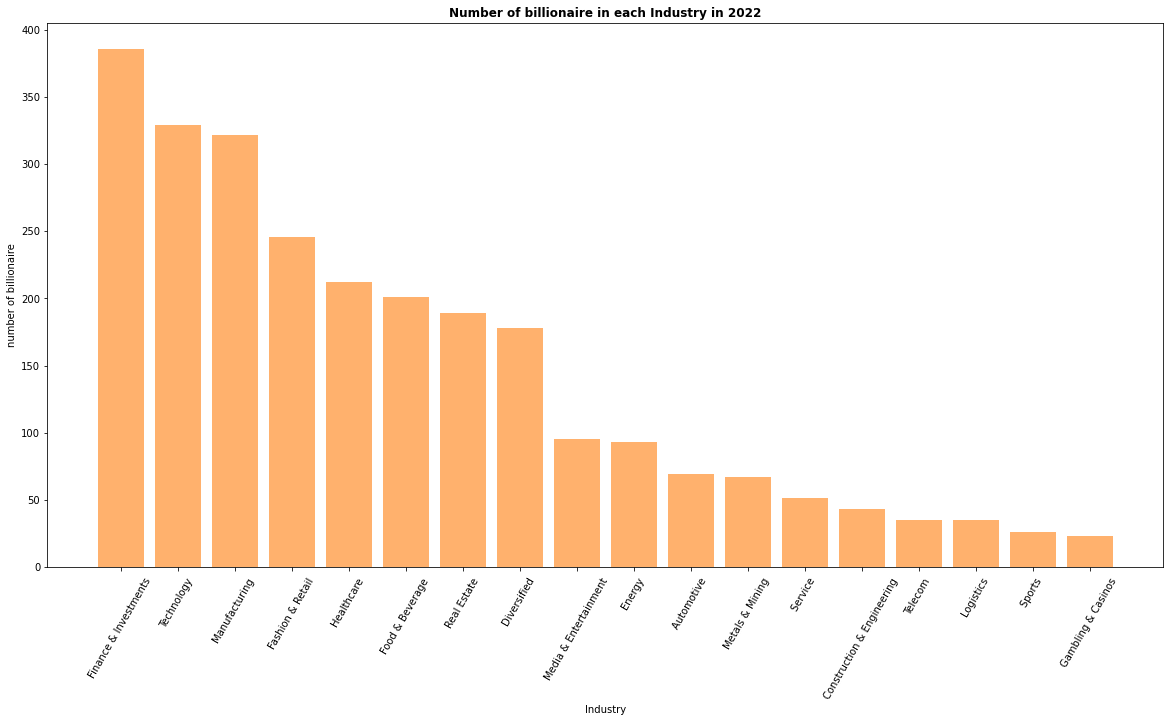

In [65]:

mcolors.XKCD_COLORS #named colors from the xkcd survey
 
plt.figure(figsize = (20,10))
plt.bar(x = Industry_df_count.index, height = Industry_df_count.values, color = mcolors.XKCD_COLORS['xkcd:apricot'])
plt.xticks(rotation = 60)
# Add title and axis names
plt.title('Number of billionaire in each Industry in 2022', weight = 'bold')
plt.xlabel('Industry')
plt.ylabel('number of billionaire')
plt.show()

In [66]:
#Which industries have highest Networth?
Industry_df = df.groupby("Industry")["Networth $B"].sum()
Industry_df    # Automotive, Construction & Engineering, Diversified, Energy and Fashion & Retail were the top five industries with the highest networth  

Industry
Automotive                      582.60
Construction & Engineering      120.90
Diversified                     939.50
Energy                          395.30
Fashion & Retail               1613.20
Finance & Investments          1734.30
Food & Beverage                 933.35
Gambling & Casinos              107.60
Healthcare                      708.90
Logistics                       196.20
Manufacturing                  1079.80
Media & Entertainment           493.60
Metals & Mining                 389.70
Real Estate                     685.80
Service                         186.10
Sports                           97.60
Technology                     2168.40
Telecom                         205.10
Name: Networth $B, dtype: float64

In [67]:
Industry_networth = pd.DataFrame(Industry_df).sort_values(by="Networth $B", ascending=False)[:10]
Industry_networth

,Networth $B
Industry,
Technology,2168.40
Finance & Investments,1734.30
Fashion & Retail,1613.20
Manufacturing,1079.80
Diversified,939.50
Food & Beverage,933.35
Healthcare,708.90
Real Estate,685.80
Automotive,582.60


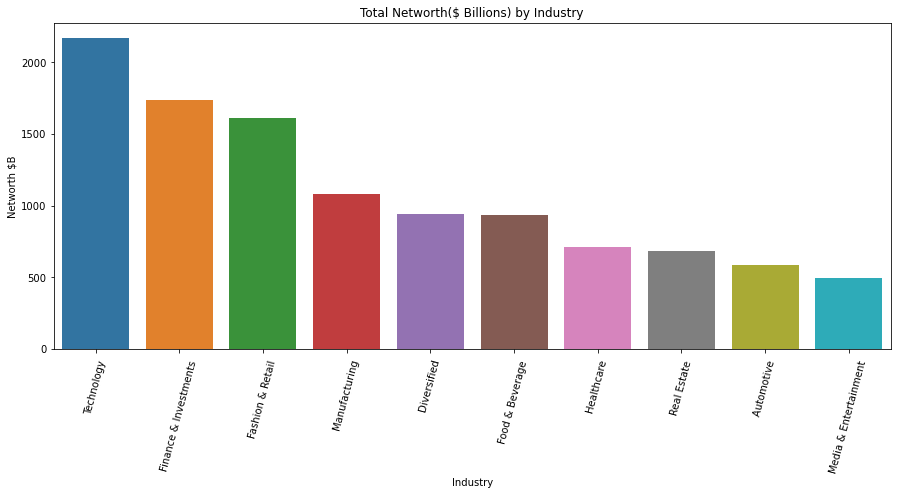

In [68]:
plt.figure(figsize=[15, 6])
plt.xticks(rotation=75)
plt.title("Total Networth($ Billions) by Industry")
sns.barplot(data=Industry_networth, x=Industry_networth.index, y=Industry_networth["Networth $B"])
plt.show()   # technology, finance and investiment, and fashin and retail are the top three industris with the highest networth in 2022

In [69]:
# Which sources have highest number of Billionaires
source_df= df['Source'].value_counts().rename_axis('Source')[:10]
source_df
    #Real estate has the highest number of billionnaies followed by investiments, pharmaceuticals
    #Top5 sources with highest number of Billionares.real estate, investiments, pharmaceuticals, diversified, software

Source
real estate        148
investments         93
pharmaceuticals     91
diversified         83
software            57
hedge funds         42
private equity      37
retail              35
chemicals           31
manufacturing       29
Name: Source, dtype: int64

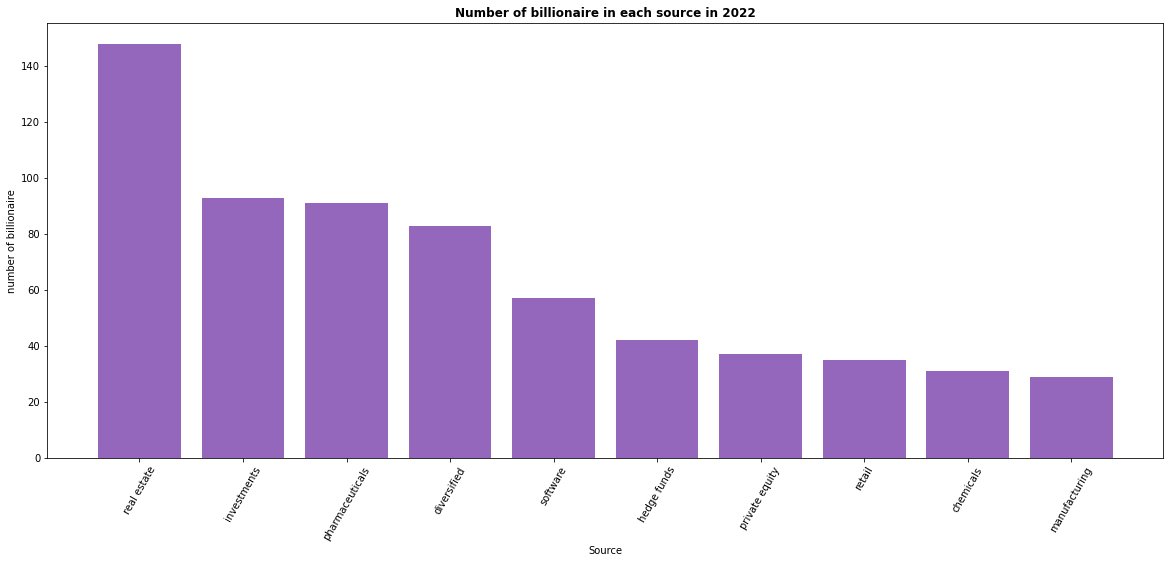

In [70]:
plt.figure(figsize = (20,8))
plt.bar(x = source_df.index, height = source_df.values, color = mcolors.TABLEAU_COLORS['tab:purple'])
plt.xticks(rotation = 60)
# Add title and axis names
plt.title('Number of billionaire in each source in 2022', weight = 'bold')
plt.xlabel('Source')
plt.ylabel('number of billionaire')
plt.show()

In [71]:
#Which sources have the highest Networth?
source_df = df.groupby("Source")["Networth $B"].sum()
source_df     

Source
3D printing                  2.4
AOL                          1.5
Airbnb                      30.7
Aldi, Trader Joe's          18.7
Aluminium                    1.2
                            ... 
wind turbines                5.8
wine                         6.6
winter jackets               3.0
wire & cables, paints        1.7
wireless networking gear    14.6
Name: Networth $B, Length: 895, dtype: float64

In [72]:
source_df = pd.DataFrame(source_df).sort_values(by="Networth $B", ascending=False)[:10]   
source_df  # real estate, Diversified, investiments, software, & pharmaceuticals were the top five sources with the highest networth 

,Networth $B
Source,
real estate,573.8
diversified,382.0
investments,358.3
software,289.7
pharmaceuticals,284.4
hedge funds,271.6
Google,260.9
Walmart,238.0
Microsoft,232.4


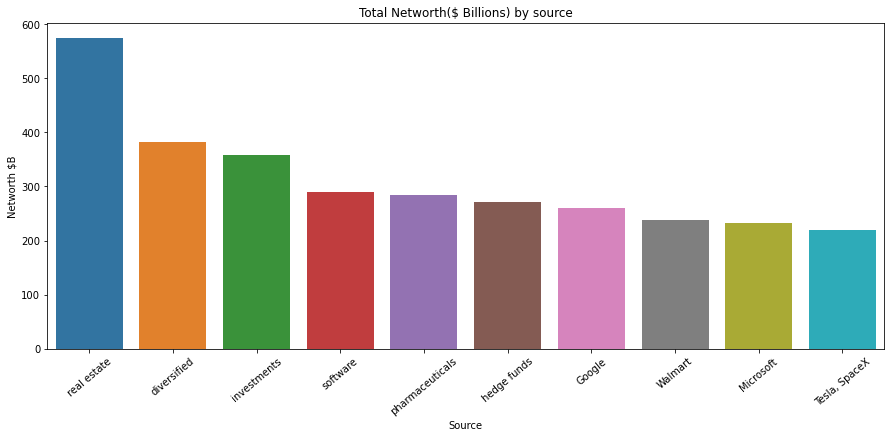

In [73]:
plt.figure(figsize=[15, 6])
plt.xticks(rotation=40)
plt.title("Total Networth($ Billions) by source")
sns.barplot(data=source_df, x=source_df.index, y=source_df["Networth $B"])
plt.show()  # real estate, Diversified, investiments, software, & pharmaceuticals were the top five sources with the highest networth 